In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
data = pd.read_csv("loan_approval_dataset.csv")

In [5]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [6]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
data.drop(columns=['loan_id'], inplace= True)

In [8]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
data.columns = data.columns.str.strip()

In [10]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [11]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Creation of new attributes

In [12]:
data['Assets'] = data.residential_assets_value + data.commercial_assets_value + data.commercial_assets_value + data.bank_asset_value

In [13]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,45600000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,10400000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,28900000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,32700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,33800000


In [14]:
data.shape

(4269, 13)

In [15]:
data.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'], inplace= True)

In [16]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,45600000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,10400000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,28900000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,32700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,33800000


In [17]:
data.shape

(4269, 9)

**Checking the outliers**

<Axes: >

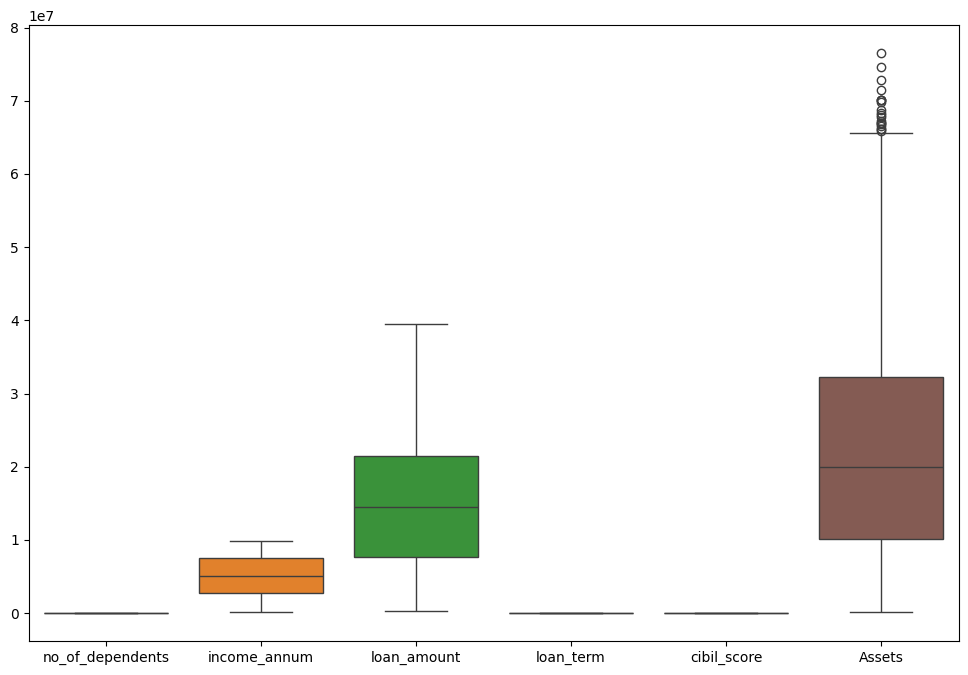

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data)

In [19]:
data.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Assets              0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
 8   Assets            4269 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 300.3+ KB


## Preprocessing

In [21]:
for col in data.columns:
    print('unique values of ' + col)
    print(data[col].unique())
    print('--------------------------------------------------------')

unique values of no_of_dependents
[2 0 3 5 4 1]
--------------------------------------------------------
unique values of education
[' Graduate' ' Not Graduate']
--------------------------------------------------------
unique values of self_employed
[' No' ' Yes']
--------------------------------------------------------
unique values of income_annum
[9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000

In [22]:
data['no_of_dependents'].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [23]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [24]:
def clean(s):
    s = s.strip()
    return s

In [25]:
clean(' Graduate')

'Graduate'

In [26]:
data.education = data.education.apply(clean)

In [27]:
data['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
data.self_employed = data.self_employed.apply(clean)

In [29]:
data.loan_status = data.loan_status.apply(clean)

**education & loan_status**

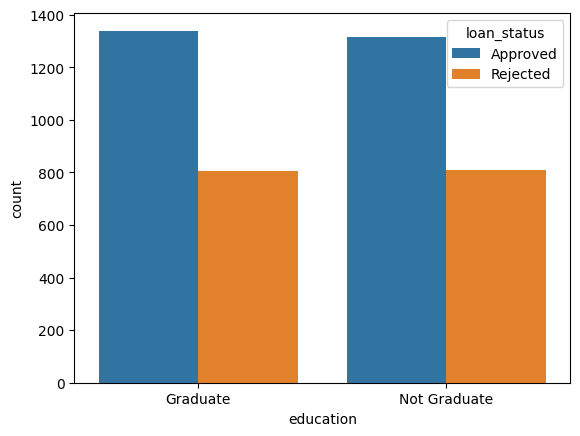

In [30]:
sns.countplot(x = "education", hue = "loan_status", data= data)
plt.show()

**Self_employed & loan_status**

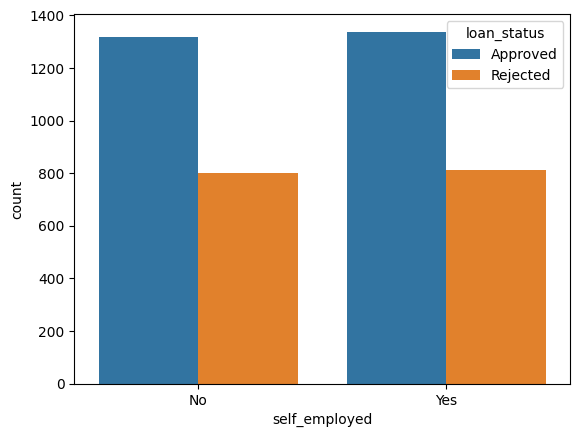

In [31]:
sns.countplot(x = "self_employed", hue = "loan_status", data= data)
plt.show()

**Income_annum**

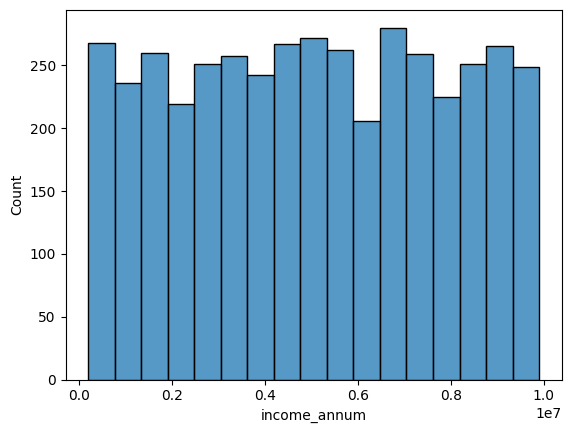

In [32]:
sns.histplot(data["income_annum"])
plt.show()

**Loan_amount**

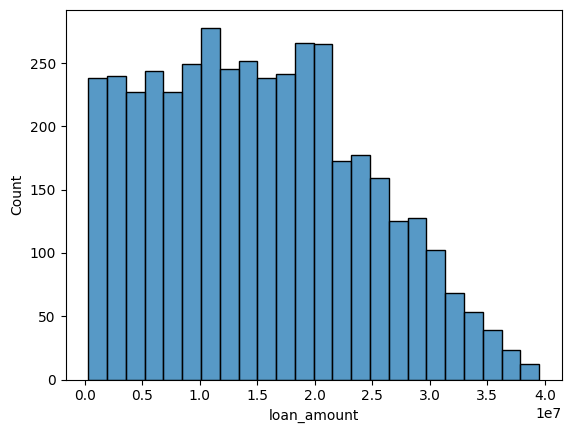

In [33]:
sns.histplot(data["loan_amount"])
plt.show()

## Log Transformation

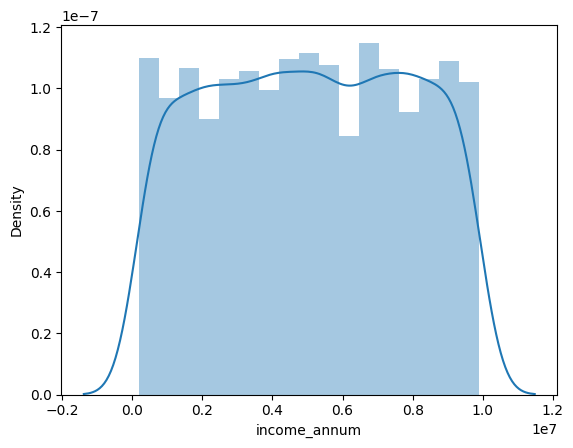

In [34]:
data['income_annum_log'] = np.log(data['income_annum'] + 1)
sns.distplot(data['income_annum'])
plt.show()

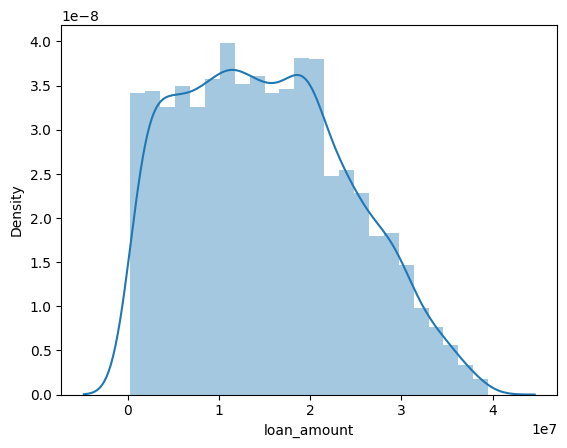

In [35]:
data['loan_amount_log'] = np.log(data['loan_amount'] + 1)
sns.distplot(data['loan_amount'])
plt.show()

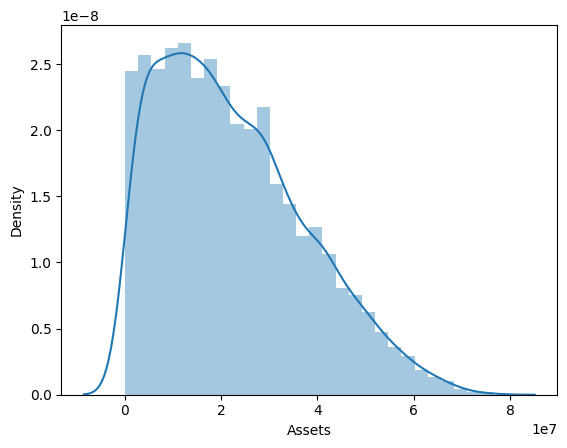

In [36]:
data['Assets_log'] = np.log(data['Assets'] + 1)
sns.distplot(data['Assets'])
plt.show()

In [37]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets,income_annum_log,loan_amount_log,Assets_log
0,2,Graduate,No,9600000,29900000,12,778,Approved,45600000,16.077274,17.213369,17.635418
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,10400000,15.226498,16.316947,16.157316
2,3,Graduate,No,9100000,29700000,20,506,Rejected,28900000,16.023785,17.206658,17.179352
3,3,Graduate,No,8200000,30700000,8,467,Rejected,32700000,15.919645,17.239773,17.302886
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,33800000,16.097893,17.001863,17.335971


In [38]:
data.shape

(4269, 12)

In [39]:
data = data.drop(columns = ['loan_amount','income_annum','Assets'], axis = 1)

In [40]:
data.shape

(4269, 9)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_of_dependents  4269 non-null   int64  
 1   education         4269 non-null   object 
 2   self_employed     4269 non-null   object 
 3   loan_term         4269 non-null   int64  
 4   cibil_score       4269 non-null   int64  
 5   loan_status       4269 non-null   object 
 6   income_annum_log  4269 non-null   float64
 7   loan_amount_log   4269 non-null   float64
 8   Assets_log        4269 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 300.3+ KB


**Replace Numerical values to categorical variables(Encoding)**

In [42]:
data.replace({
    "loan_status": {'Rejected': 0, 'Approved': 1},
    "education": {'Not Graduate': 0, 'Graduate': 1},
    "self_employed": {'No': 0, 'Yes': 1}
}, inplace=True)

## Coorelation Matrix

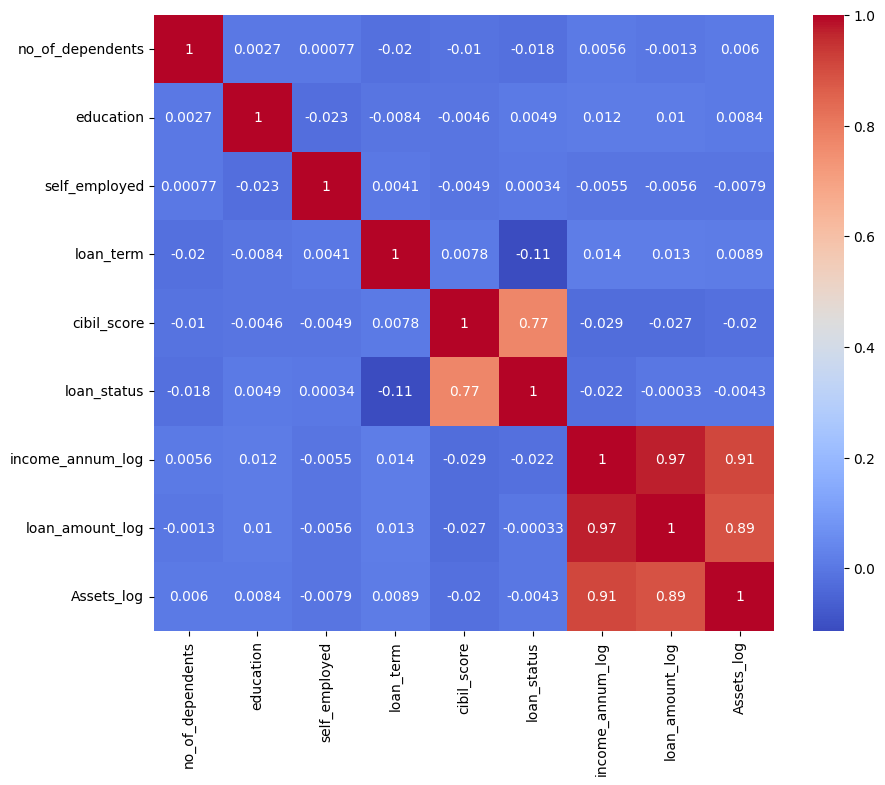

In [43]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_of_dependents  4269 non-null   int64  
 1   education         4269 non-null   int64  
 2   self_employed     4269 non-null   int64  
 3   loan_term         4269 non-null   int64  
 4   cibil_score       4269 non-null   int64  
 5   loan_status       4269 non-null   int64  
 6   income_annum_log  4269 non-null   float64
 7   loan_amount_log   4269 non-null   float64
 8   Assets_log        4269 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 300.3 KB


In [45]:
data.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,loan_status,income_annum_log,loan_amount_log,Assets_log
0,2,1,0,12,778,1,16.077274,17.213369,17.635418
1,0,0,1,8,417,0,15.226498,16.316947,16.157316
2,3,1,0,20,506,0,16.023785,17.206658,17.179352
3,3,1,0,8,467,0,15.919645,17.239773,17.302886
4,5,0,1,20,382,0,16.097893,17.001863,17.335971


In [46]:
X = data.drop(columns=['loan_status'], axis=1)
Y = data['loan_status']

## Model Building

***Splitting the data into Training data & split data***

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
print(X.shape, x_train.shape, x_test.shape)

(4269, 8) (3415, 8) (854, 8)


In [49]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [50]:
def find_best_model_using_gridsearchcv(X,Y):

    algorithms = {
        'Logistic_Regression' : {
            'model': LogisticRegression(),
            'params': {
                'fit_intercept': [True, False],
                'C': [1,2,3,4]
            }
        },

        'DecisionTree_Classifier' : {
            'model': DecisionTreeClassifier(),
            'params': {
                'splitter': ['best','random'],
                'criterion': ['gini', 'entropy']
            }
        },

        'RandomForest_Classifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators' : [100, 200, 300],
                'max_features' : ['sqrt','log2']
            }
        },

         'KNeighbors_Classifier' : {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors' : [3,4,5,6],
                'weights': ['uniform', 'distance',]
            }
        },

         'SVC' : {
            'model': SVC(),
            'params': {
                'C': [1,2,3,4],
                
            }
         }
        
    }
            
    score = []                
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algorithms.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score= False)
        gs.fit(X,Y)
        score.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(score, columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,Logistic_Regression,0.906557,"{'C': 1, 'fit_intercept': False}"
1,DecisionTree_Classifier,0.981733,"{'criterion': 'gini', 'splitter': 'best'}"
2,RandomForest_Classifier,0.977986,"{'max_features': 'log2', 'n_estimators': 300}"
3,KNeighbors_Classifier,0.952693,"{'n_neighbors': 4, 'weights': 'uniform'}"
4,SVC,0.945433,{'C': 2}


**Based on above results we can say that Decision tree gives the high score. Hence we will use that.**

In [51]:
model_tree = DecisionTreeClassifier(criterion = 'entropy', splitter= 'best')

In [52]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = model_tree.predict(x_train)
y_test_pred = model_tree.predict(x_test)

In [54]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    classes = ['Rejected', 'Approved']
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.show()

Train score 1.0
Test score 0.9847775175644028
Train Confusion matrix


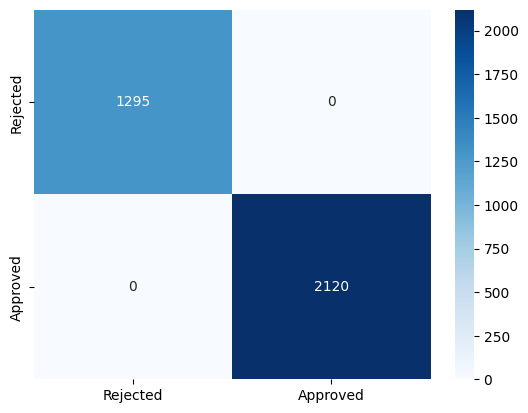

Test Confusion matrix


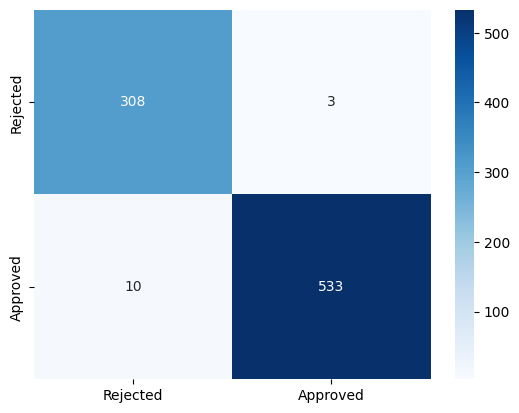

In [55]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [56]:
data.head(1)

,no_of_dependents,education,self_employed,loan_term,cibil_score,loan_status,income_annum_log,loan_amount_log,Assets_log
0,2,1,0,12,778,1,16.077274,17.213369,17.635418


In [59]:
Pred_data = pd.DataFrame([[2,1,0,12,778,16.077274,17.213369,17.635418]])

In [60]:
model_tree.predict(Pred_data)

array([1], dtype=int64)

## Export the tested model to a pickle file

In [64]:
import pickle as pk

In [65]:
pk.dump(model_tree, open("Loan_Prediction_Model.Pickle", 'wb'))

In [2]:
import math


In [3]:
log_x = 2  # example natural log value
x = math.exp(log_x)
print(x) 

7.38905609893065
